## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  46.480150   303.999939  0.786654   7.344990  1.321720
1  81.065410   747.667644  0.527902  10.140219  1.435252
2  43.965503   787.852057  0.372833   5.128013  1.274200
3  73.503435  1535.332008  0.769857   2.889453  1.577941
4  24.960255  1002.178060  0.823645   4.756868  1.591469


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9790871	total: 57.8ms	remaining: 57.8s
1:	learn: 0.9680265	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9582204	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9473718	total: 59.6ms	remaining: 14.9s
4:	learn: 0.9370853	total: 60.1ms	remaining: 12s
5:	learn: 0.9272580	total: 60.6ms	remaining: 10s
6:	learn: 0.9182515	total: 61.1ms	remaining: 8.67s
7:	learn: 0.9090597	total: 61.7ms	remaining: 7.66s
8:	learn: 0.8989504	total: 62.2ms	remaining: 6.85s
9:	learn: 0.8882462	total: 62.7ms	remaining: 6.2s
10:	learn: 0.8799752	total: 63.3ms	remaining: 5.69s
11:	learn: 0.8712093	total: 63.8ms	remaining: 5.25s
12:	learn: 0.8649008	total: 64.3ms	remaining: 4.88s
13:	learn: 0.8565538	total: 64.9ms	remaining: 4.57s
14:	learn: 0.8472001	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8377780	total: 65.7ms	remaining: 4.04s
16:	learn: 0.8281442	total: 66.2ms	remaining: 3.83s
17:	learn: 0.8202536	total: 66.6ms	remaining: 3.63s
18:	learn: 0.8146970	total: 67.1ms	remaining: 3.4

129:	learn: 0.3521467	total: 116ms	remaining: 777ms
130:	learn: 0.3506037	total: 117ms	remaining: 774ms
131:	learn: 0.3484286	total: 117ms	remaining: 769ms
132:	learn: 0.3467744	total: 117ms	remaining: 765ms
133:	learn: 0.3446663	total: 118ms	remaining: 761ms
134:	learn: 0.3428739	total: 118ms	remaining: 758ms
135:	learn: 0.3409167	total: 119ms	remaining: 753ms
136:	learn: 0.3390716	total: 119ms	remaining: 750ms
137:	learn: 0.3370261	total: 119ms	remaining: 746ms
138:	learn: 0.3346828	total: 120ms	remaining: 741ms
139:	learn: 0.3328022	total: 120ms	remaining: 738ms
140:	learn: 0.3308285	total: 120ms	remaining: 734ms
141:	learn: 0.3289761	total: 121ms	remaining: 730ms
142:	learn: 0.3271477	total: 121ms	remaining: 726ms
143:	learn: 0.3251409	total: 121ms	remaining: 722ms
144:	learn: 0.3234145	total: 122ms	remaining: 718ms
145:	learn: 0.3214278	total: 122ms	remaining: 716ms
146:	learn: 0.3194312	total: 123ms	remaining: 714ms
147:	learn: 0.3172920	total: 124ms	remaining: 711ms
148:	learn: 

291:	learn: 0.1627367	total: 185ms	remaining: 449ms
292:	learn: 0.1621585	total: 186ms	remaining: 448ms
293:	learn: 0.1617547	total: 186ms	remaining: 447ms
294:	learn: 0.1612193	total: 187ms	remaining: 446ms
295:	learn: 0.1606166	total: 187ms	remaining: 445ms
296:	learn: 0.1600462	total: 188ms	remaining: 444ms
297:	learn: 0.1594994	total: 188ms	remaining: 443ms
298:	learn: 0.1590127	total: 188ms	remaining: 442ms
299:	learn: 0.1585462	total: 189ms	remaining: 441ms
300:	learn: 0.1580474	total: 189ms	remaining: 440ms
301:	learn: 0.1575202	total: 190ms	remaining: 439ms
302:	learn: 0.1570108	total: 190ms	remaining: 438ms
303:	learn: 0.1563514	total: 191ms	remaining: 436ms
304:	learn: 0.1559082	total: 191ms	remaining: 436ms
305:	learn: 0.1552713	total: 192ms	remaining: 435ms
306:	learn: 0.1549194	total: 192ms	remaining: 433ms
307:	learn: 0.1544034	total: 192ms	remaining: 432ms
308:	learn: 0.1539761	total: 193ms	remaining: 431ms
309:	learn: 0.1534794	total: 193ms	remaining: 430ms
310:	learn: 

554:	learn: 0.0822519	total: 298ms	remaining: 239ms
555:	learn: 0.0819979	total: 298ms	remaining: 238ms
556:	learn: 0.0819284	total: 299ms	remaining: 238ms
557:	learn: 0.0816394	total: 299ms	remaining: 237ms
558:	learn: 0.0813553	total: 299ms	remaining: 236ms
559:	learn: 0.0812179	total: 300ms	remaining: 236ms
560:	learn: 0.0810092	total: 300ms	remaining: 235ms
561:	learn: 0.0807320	total: 300ms	remaining: 234ms
562:	learn: 0.0805991	total: 301ms	remaining: 233ms
563:	learn: 0.0803981	total: 301ms	remaining: 233ms
564:	learn: 0.0802692	total: 301ms	remaining: 232ms
565:	learn: 0.0800716	total: 302ms	remaining: 231ms
566:	learn: 0.0798238	total: 302ms	remaining: 231ms
567:	learn: 0.0797478	total: 303ms	remaining: 230ms
568:	learn: 0.0794780	total: 303ms	remaining: 230ms
569:	learn: 0.0792387	total: 304ms	remaining: 229ms
570:	learn: 0.0790240	total: 304ms	remaining: 229ms
571:	learn: 0.0787895	total: 305ms	remaining: 228ms
572:	learn: 0.0785588	total: 305ms	remaining: 228ms
573:	learn: 

729:	learn: 0.0464303	total: 366ms	remaining: 135ms
730:	learn: 0.0462404	total: 367ms	remaining: 135ms
731:	learn: 0.0460824	total: 367ms	remaining: 134ms
732:	learn: 0.0459313	total: 368ms	remaining: 134ms
733:	learn: 0.0458105	total: 368ms	remaining: 133ms
734:	learn: 0.0456456	total: 368ms	remaining: 133ms
735:	learn: 0.0455024	total: 369ms	remaining: 132ms
736:	learn: 0.0453543	total: 369ms	remaining: 132ms
737:	learn: 0.0451534	total: 370ms	remaining: 131ms
738:	learn: 0.0450130	total: 370ms	remaining: 131ms
739:	learn: 0.0448968	total: 371ms	remaining: 130ms
740:	learn: 0.0447402	total: 371ms	remaining: 130ms
741:	learn: 0.0444927	total: 372ms	remaining: 129ms
742:	learn: 0.0442985	total: 372ms	remaining: 129ms
743:	learn: 0.0441315	total: 373ms	remaining: 128ms
744:	learn: 0.0440197	total: 373ms	remaining: 128ms
745:	learn: 0.0438517	total: 373ms	remaining: 127ms
746:	learn: 0.0437129	total: 374ms	remaining: 127ms
747:	learn: 0.0435509	total: 374ms	remaining: 126ms
748:	learn: 

983:	learn: 0.0248663	total: 479ms	remaining: 7.79ms
984:	learn: 0.0248409	total: 480ms	remaining: 7.3ms
985:	learn: 0.0247833	total: 480ms	remaining: 6.82ms
986:	learn: 0.0247581	total: 480ms	remaining: 6.33ms
987:	learn: 0.0247159	total: 481ms	remaining: 5.84ms
988:	learn: 0.0246909	total: 481ms	remaining: 5.35ms
989:	learn: 0.0246663	total: 482ms	remaining: 4.87ms
990:	learn: 0.0246399	total: 482ms	remaining: 4.38ms
991:	learn: 0.0246021	total: 483ms	remaining: 3.89ms
992:	learn: 0.0245761	total: 483ms	remaining: 3.41ms
993:	learn: 0.0245518	total: 484ms	remaining: 2.92ms
994:	learn: 0.0245264	total: 484ms	remaining: 2.43ms
995:	learn: 0.0245024	total: 485ms	remaining: 1.95ms
996:	learn: 0.0244614	total: 485ms	remaining: 1.46ms
997:	learn: 0.0244376	total: 486ms	remaining: 973us
998:	learn: 0.0244129	total: 486ms	remaining: 486us
999:	learn: 0.0243620	total: 486ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


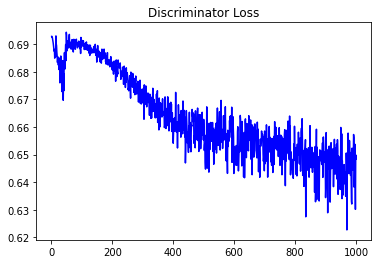

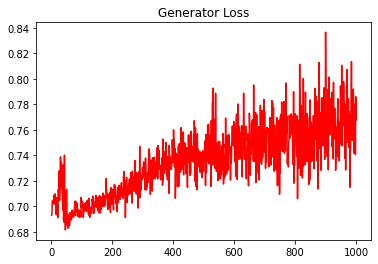

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.39833479881516615


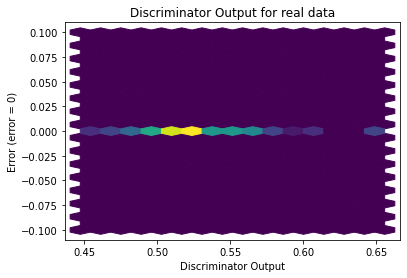

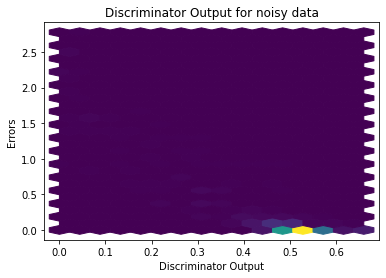

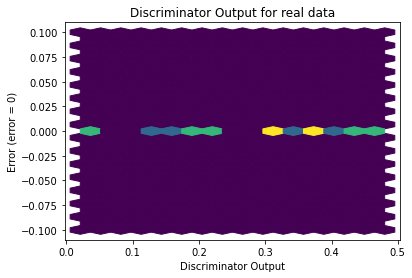

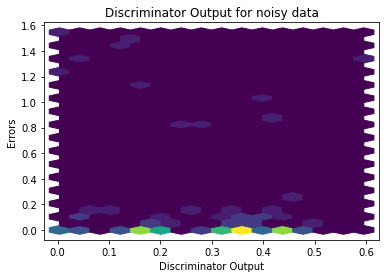

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2587]], requires_grad=True)
